   ### Assignment -1 <u>Tips Data Analysis.</u>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Note: Taking df as a variable

In [4]:
df = pd.read_excel('Tips.xlsx')

In [5]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### 1.<u> What is the overall average tip?</u>


In [42]:
df.tip.mean()
np.around(df.tip.mean())



3.0

##### 2. <u>Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?</u>

In [8]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

##### There is no difference between mean and median.

##### 3. <u>Prepare a boxplot for 'tip', are there any outliers?</u>

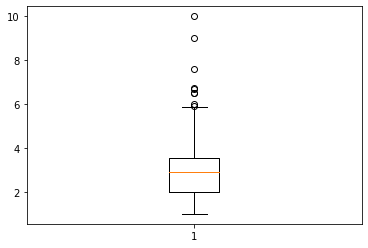

In [9]:
plt.boxplot(x= df['tip'])
plt.show()

In [10]:
df[df.tip>=8]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4


##### Yes. The tip field contains outliers

##### 4. <u>Prepare a boxplot for 'total_bill', are there any outliers?</u>

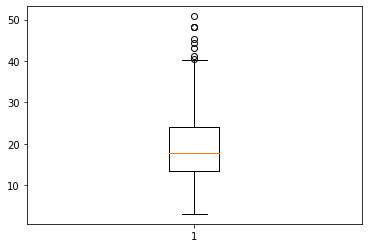

In [11]:
plt.boxplot(x = df['total_bill'])
plt.show()

In [12]:
df[df.total_bill>45]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


##### Yes. There are certain outliers in the total bill

##### 5. <u>Gender: what is the percent of females in the data?</u>

In [13]:
 a = df.sex.value_counts(normalize = True)
a

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

##### 35% are Female

##### 6.<u> Prepare a bar plot with the bars representing the percentage of records for each gender</u>

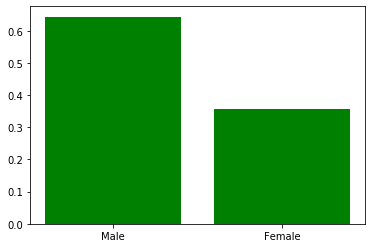

In [14]:
plt.bar(a.index, a.values, color="green")
plt.show()

##### 7 <u>Does the average tip differ by gender? Does one gender tip more than the other?</u>

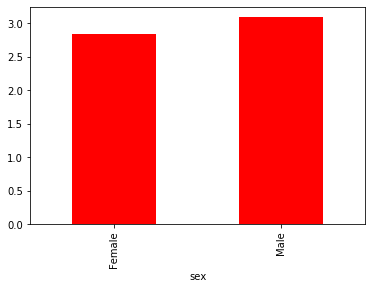

In [15]:
df.groupby(['sex'])['tip'].mean().plot.bar(color="red")
plt.show()

##### From above output we can say that the average tip slightly differs by gender. Male tip is slightly more than Female.

##### 8. <u>Does the average tip differ by the time of day?</u>

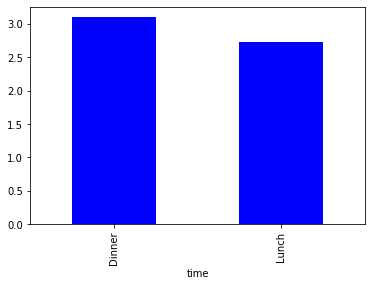

In [16]:
df.groupby(['time'])['tip'].mean().plot.bar(color="blue")
plt.show()

##### Yes. The average tip at dinner is slightly more compared to lunch

##### 9.<u> Does the average tip differ by size (number of people at the table)?</u>

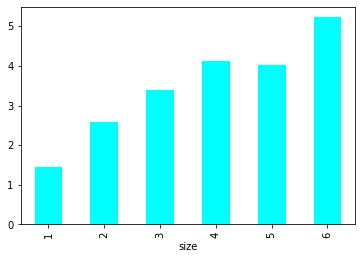

In [17]:
df.groupby(['size'])['tip'].mean().plot.bar(color="cyan")
plt.show()

##### It shows that more number of people higher is the tip.

##### 10. <u>Do smokers tip more than non-smokers?</u>

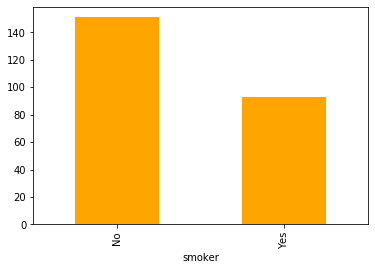

In [18]:
df.groupby(['smoker'])['tip'].count().plot.bar(color="orange")
plt.show()

##### NO. Smoker give less tip than non smoker.

##### 11 <u>Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?</u>

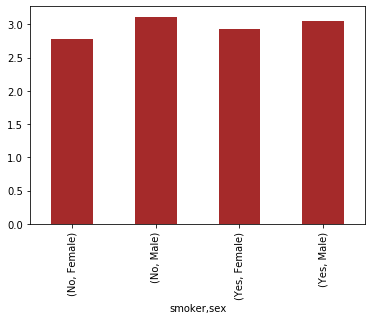

In [19]:
df.groupby(['smoker','sex'])['tip'].mean().plot.bar(color="brown")
plt.show()

In [20]:
df.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.931515,3.051167


In [21]:
pd.pivot_table(data=df, index='sex',columns='smoker',values='tip')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [22]:
pd.pivot_table(data=df, index='sex',columns='smoker',values='tip',aggfunc=np.median)

smoker,No,Yes
sex,,
Female,2.68,2.88
Male,2.74,3.00


In [23]:
pd.pivot_table(data=df, index='sex',columns='smoker',values='tip',aggfunc= lambda x:np.quantile(x,0.2))

smoker,No,Yes
sex,,
Female,1.752,2.0
Male,2.000,2.0


##### The group with Male and Non-smoker tips the most. Also group with Male and smoker tips slightly less than group with Male non-smoker

##### 12. <u>Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.</u>

In [24]:
df.insert(2,"pct_tip",df.tip/df.total_bill)


In [25]:
df.head()

,total_bill,tip,pct_tip,sex,smoker,day,time,size
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4


##### 13<u> Does pct_tip differ by gender? Does one gender tip more than the other?</u>

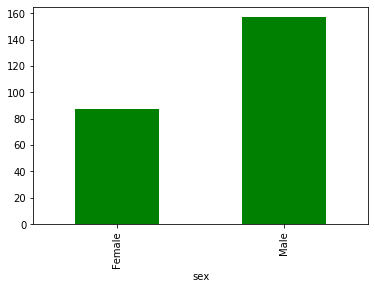

In [29]:
df.groupby(['sex'])['pct_tip'].count().plot.bar(color="green")
plt.show()

In [30]:
pd.pivot_table(data=df, index='sex',columns='smoker',values='pct_tip')

smoker,No,Yes
sex,,
Female,0.156921,0.182150
Male,0.160669,0.152771


##### Yes, the pct_tip differs by gender. Male tip more than female

##### 14. <u>Does pct_tip differ by size (number of people at the table)?</u>

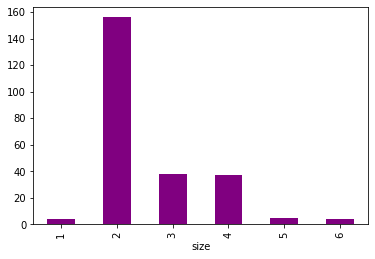

In [31]:
df.groupby(['size'])['pct_tip'].count().plot.bar(color="purple")
plt.show()

##### Yes, pct_tip do differ by size. The table with size 2 gives maximum pct_tip


##### 15. <u>Make the gender vs. smoker view using pct_tip - does your inference change?</u>

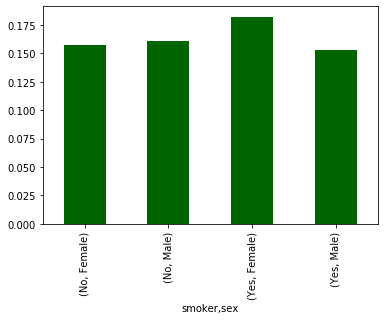

In [32]:
df.groupby(['smoker','sex'])['pct_tip'].mean().plot.bar(color="darkgreen")
plt.show()

##### Yes, group with Female smoker gives more average pct_tip

##### 16.<u> Make a scatter plot of total_bill vs. tip</u>

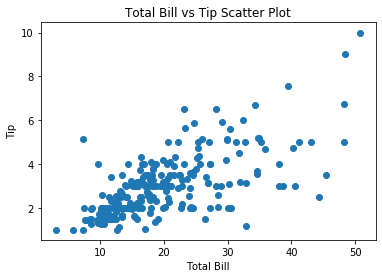

In [33]:
plt.scatter(x='total_bill', y='tip', data = df)
plt.xlabel('Total Bill')              
plt.ylabel('Tip')
plt.title('Total Bill vs Tip Scatter Plot')            
plt.show()

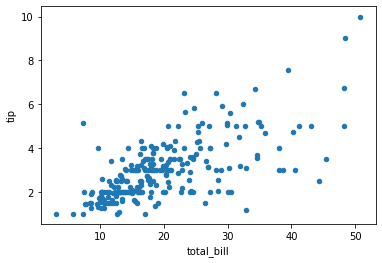

In [34]:
df.plot.scatter(x='total_bill', y='tip')

In [35]:
import seaborn as sns

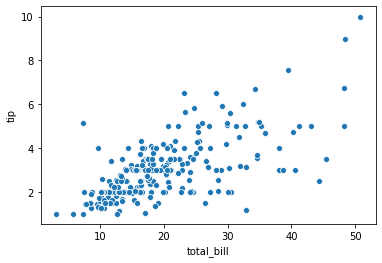

In [36]:
sns.scatterplot(x='total_bill', y='tip', data = df)

##### Thus, higher the amount of bill, higher the tip

##### 17. <u>Make a scatter plot of total_bill vs. pct_tip.</u>

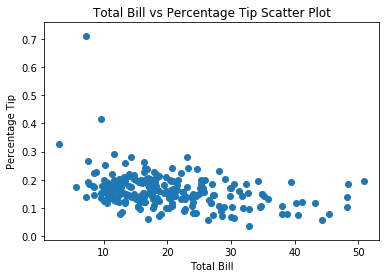

In [37]:
plt.scatter(x='total_bill', y='pct_tip', data = df)
plt.xlabel('Total Bill')              
plt.ylabel('Percentage Tip')
plt.title('Total Bill vs Percentage Tip Scatter Plot')            
plt.show()

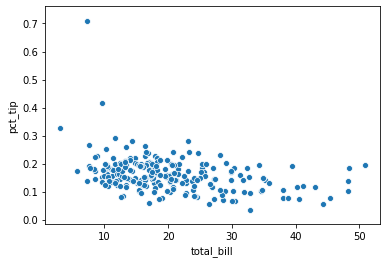

In [38]:
sns.scatterplot(x='total_bill', y='pct_tip', data = df)

##### Thus, higher the amount of bill doesn't make much difference to pct_bill